In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the office annual CSV data
office_annual_csv_path = '/Users/owenkadis/Downloads/Office Annual CSV.csv'  # Update this path
office_annual_data = pd.read_csv(office_annual_csv_path)

# Convert 'Period' to datetime format for easier manipulation
office_annual_data['Period'] = pd.to_datetime(office_annual_data['Period'].str.replace(' Q', '-Q'))

# Set the Period as the index for time-series calculations
office_annual_data.set_index('Period', inplace=True)

# Sort the data by Period to ensure correct time-series calculations
office_annual_data.sort_index(inplace=True)

In [12]:
# Correcting the code to avoid SettingWithCopyWarning
# Creating a copy of the slice to ensure changes are made on the copy intentionally
cbsa_47900_data = office_annual_data[office_annual_data['CBSA Code'] == 47900].copy()

# Calculate the annual trailing returns for "Market Sale Price Per SF"
cbsa_47900_data['Trailing Returns'] = cbsa_47900_data.groupby(['CBSA Code', 'Geography Name'])['Market Sale Price Per SF'].pct_change(4) * 100

# Calculate the 12-month moving average for "Market Sale Price Per SF" as the trend
cbsa_47900_data['Price to Trend'] = cbsa_47900_data.groupby(['CBSA Code', 'Geography Name'])['Market Sale Price Per SF'].transform(lambda x: x.rolling(window=4, min_periods=1).mean())

# Calculate the deviation from the trend
cbsa_47900_data['Deviation From Trend'] = cbsa_47900_data['Market Sale Price Per SF'] - cbsa_47900_data['Price to Trend']


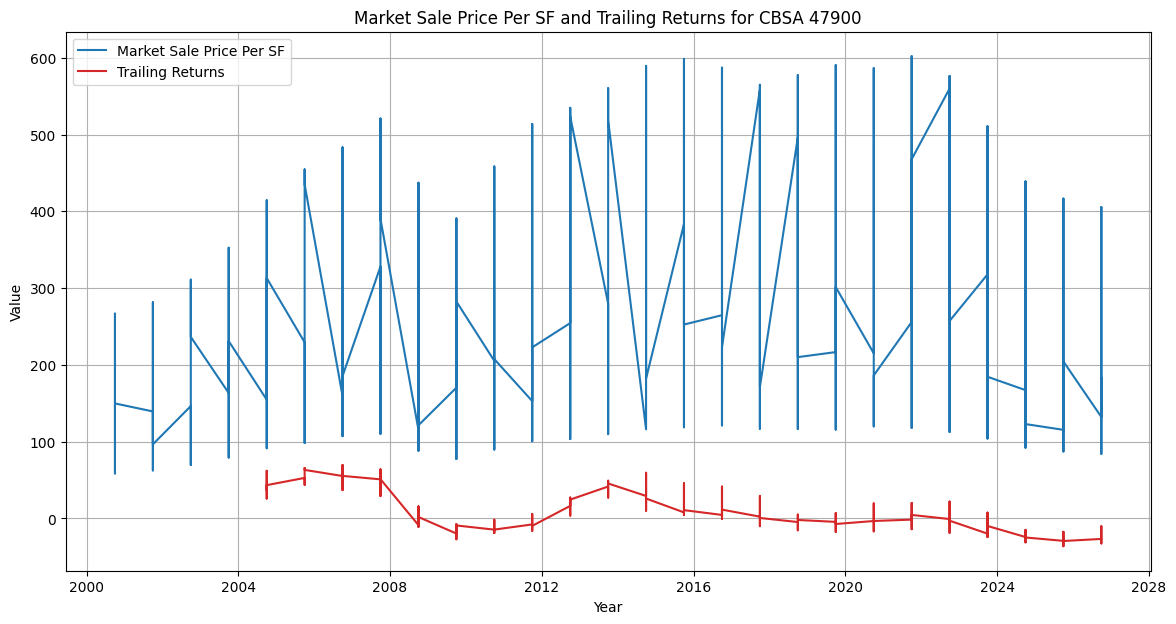

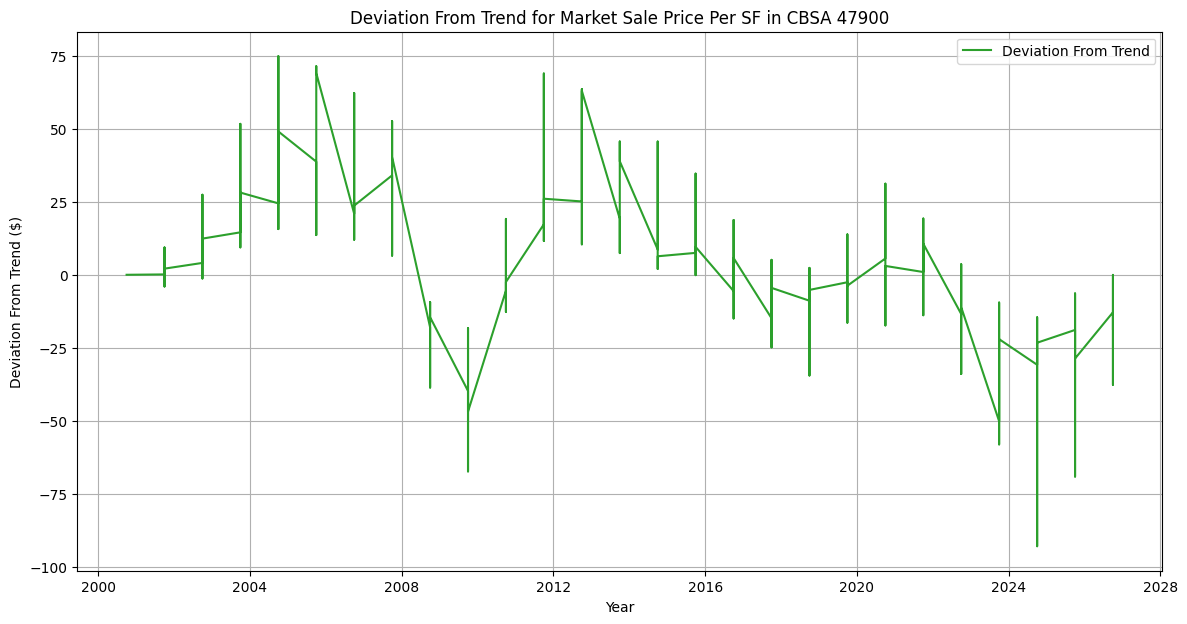

In [13]:

# Begin Exploratory Data Analysis (EDA) with visualizations

# Plotting Market Sale Price Per SF and Trailing Returns
plt.figure(figsize=(14, 7))
plt.plot(cbsa_47900_data.index, cbsa_47900_data['Market Sale Price Per SF'], label='Market Sale Price Per SF', color='tab:blue')
plt.plot(cbsa_47900_data.index, cbsa_47900_data['Trailing Returns'], label='Trailing Returns', color='tab:red')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Market Sale Price Per SF and Trailing Returns for CBSA 47900')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Deviation From Trend
plt.figure(figsize=(14, 7))
plt.plot(cbsa_47900_data.index, cbsa_47900_data['Deviation From Trend'], label='Deviation From Trend', color='tab:green')
plt.xlabel('Year')
plt.ylabel('Deviation From Trend ($)')
plt.title('Deviation From Trend for Market Sale Price Per SF in CBSA 47900')
plt.legend()
plt.grid(True)
plt.show()


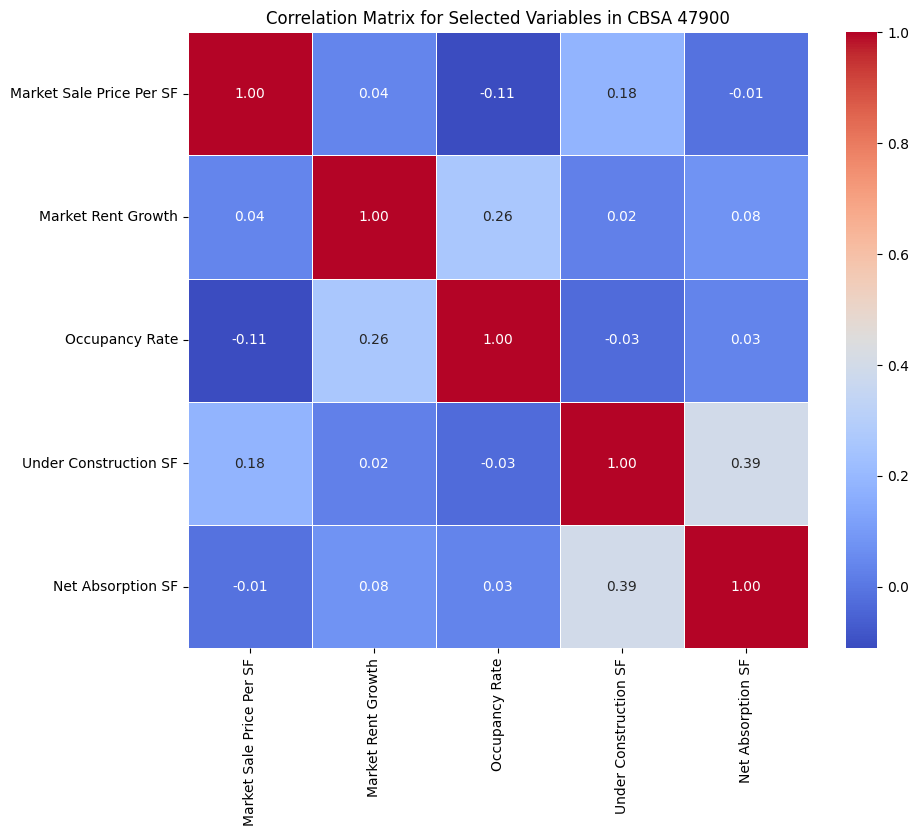

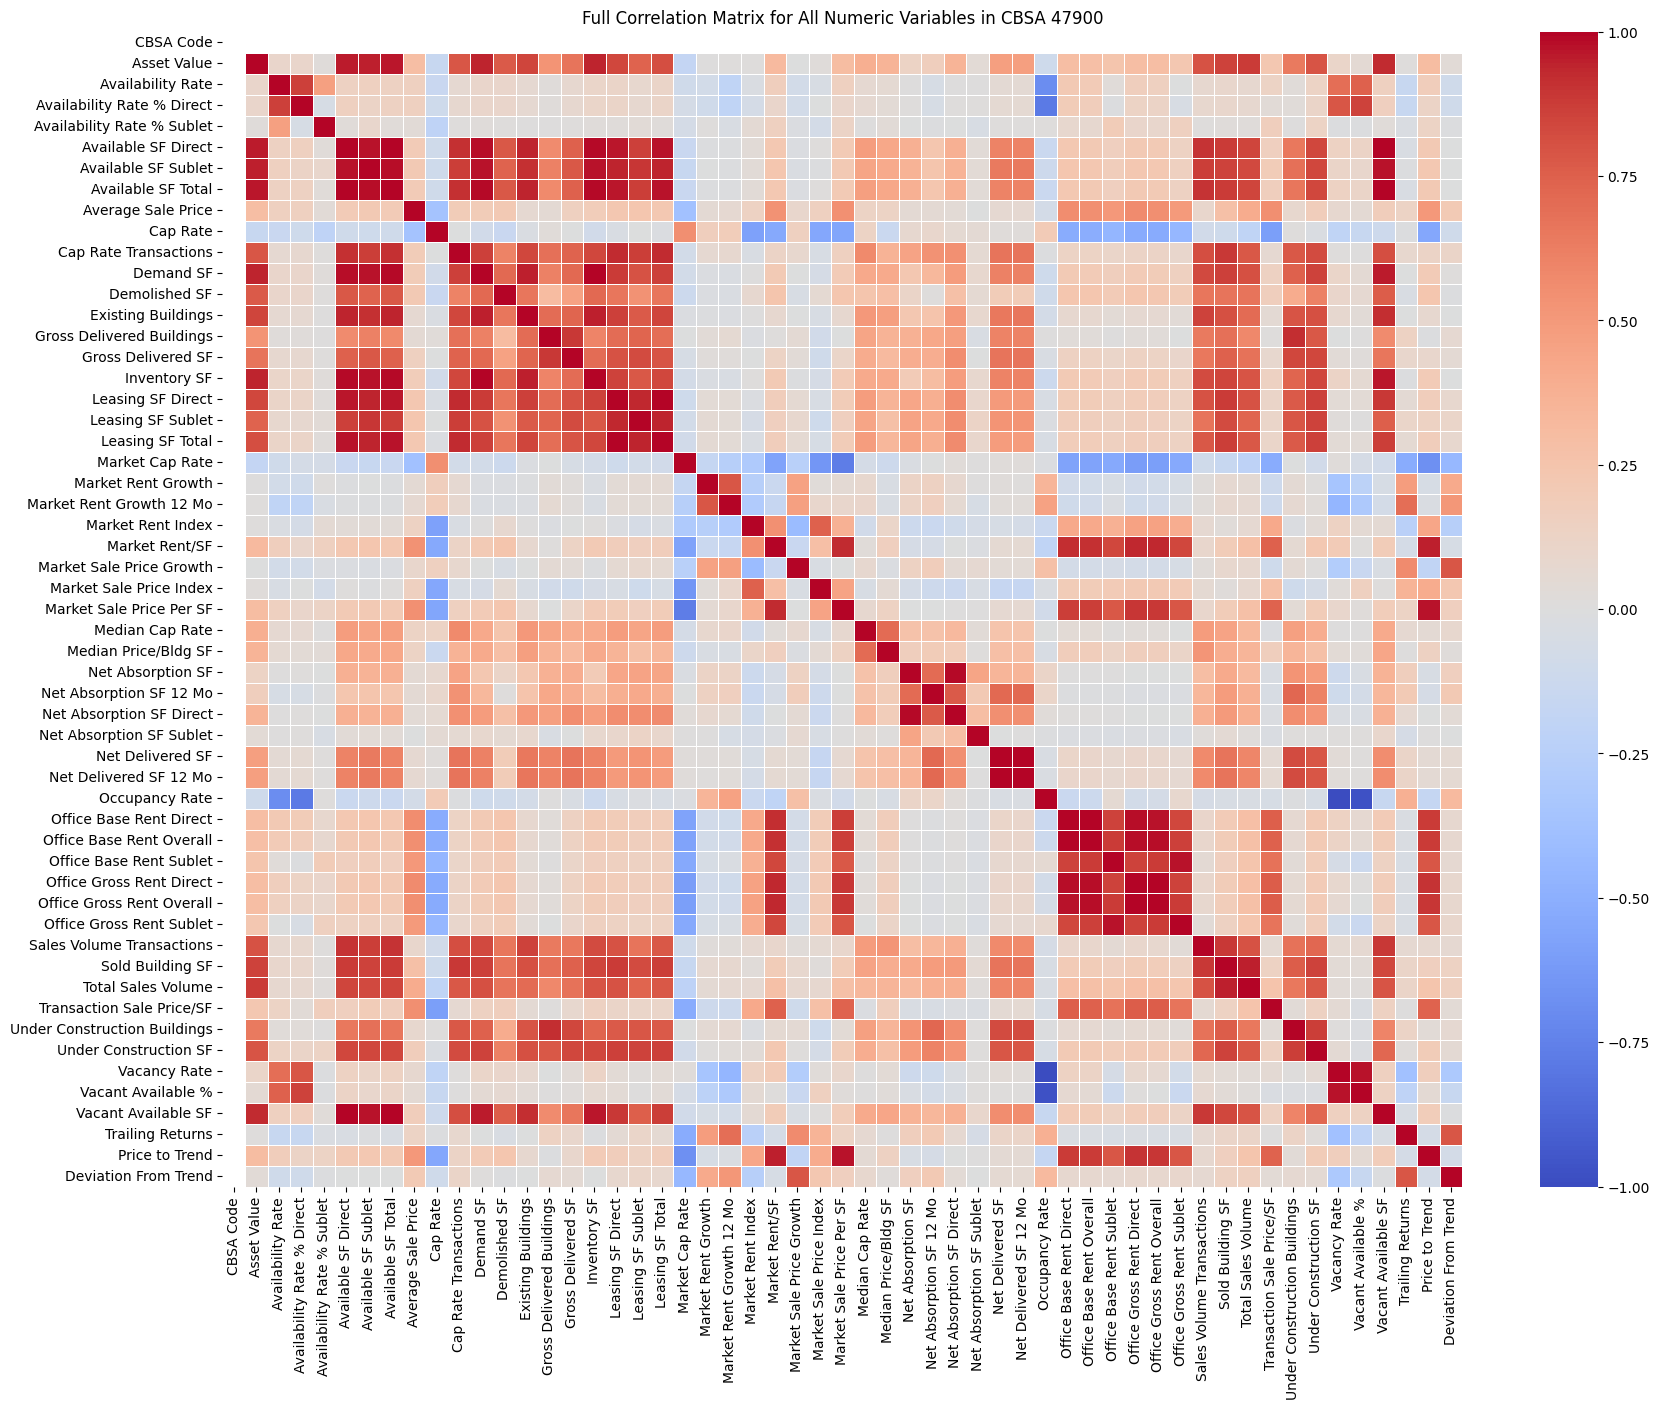

In [14]:

# Correlation Analysis for selected variables
correlation_columns = [
    'Market Sale Price Per SF',
    'Market Rent Growth',
    'Occupancy Rate',
    'Under Construction SF',
    'Net Absorption SF'
]
correlation_data = cbsa_47900_data[correlation_columns].dropna()
correlation_matrix = correlation_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Selected Variables in CBSA 47900')
plt.show()

# Full Correlation Analysis including all numeric variables
full_correlation_matrix = cbsa_47900_data.select_dtypes(include=[np.number]).corr()

# Plotting the full correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(full_correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Full Correlation Matrix for All Numeric Variables in CBSA 47900')
plt.show()


In [16]:
# Load the Field Definitions file
field_definitions_path = '/Users/owenkadis/Downloads/DataExport - Field Definitions-7-8-2020.xlsx'
field_definitions = pd.read_excel(field_definitions_path)

# Display the first few rows of the Field Definitions to understand its structure
field_definitions.head()

# Load the Office Annual CSV file
office_annual_csv_path = '/Users/owenkadis/Downloads/Office Annual CSV.csv'
office_annual_data = pd.read_csv(office_annual_csv_path)

# Display the first few rows of the Office Annual data to understand its structure
office_annual_data.head()

# Identifying unique geographies and their data counts
geography_counts = office_annual_data['Geography Name'].value_counts()

# Displaying the top geographies based on the number of records
geography_counts.head(10)


Dallas-Fort Worth - TX         46
Abilene - TX                   45
Fort Myers - FL                45
Fargo - ND                     45
Farmington - NM                45
Fayetteville - NC              45
Flagstaff - AZ                 45
Flint - MI                     45
Florence - SC                  45
Florence-Muscle Shoals - AL    45
Name: Geography Name, dtype: int64

/var/folders/nj/hnljrqgn5b1dbypr2cfwwq8m0000gn/T/ipykernel_87407/191412835.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfw_office_data['Period'] = pd.to_datetime(dfw_office_data['Period'].str.replace(' Q', '-Q'))


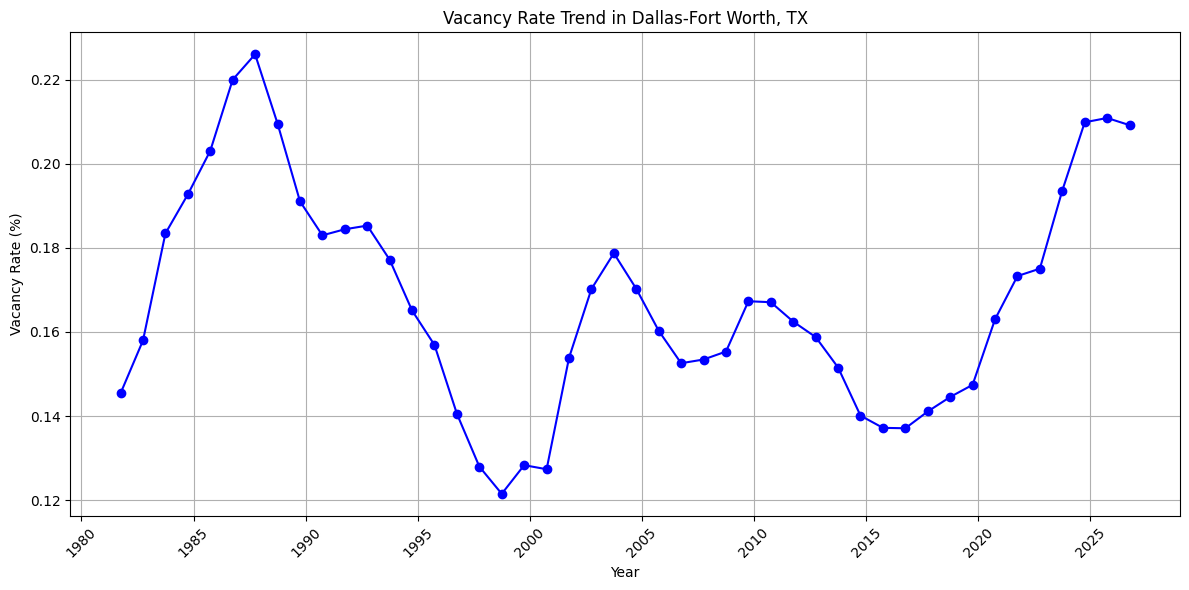

['Washington - DC',
 'Washington - DC - Alexandria/I-395 Area (Cluster)',
 'Washington - DC - Annandale',
 'Washington - DC - Ballston',
 'Washington - DC - Beltsville/Calverton',
 'Washington - DC - Bethesda/Chevy Chase (Cluster)',
 'Washington - DC - Bethesda/Chevy Chase',
 'Washington - DC - Bowie',
 'Washington - DC - Branch Avenue Corridor',
 'Washington - DC - Calvert County (Cluster)',
 'Washington - DC - Calvert County',
 'Washington - DC - Capitol Hill',
 'Washington - DC - Capitol Hill Area (Cluster)',
 'Washington - DC - Capitol Riverfront',
 'Washington - DC - CBD',
 'Washington - DC - Charles County (Cluster)',
 'Washington - DC - Charles County',
 'Washington - DC - Clarendon/Courthouse',
 'Washington - DC - Clarke County (Cluster)',
 'Washington - DC - Clarke County',
 'Washington - DC - College Park',
 'Washington - DC - Crystal City',
 'Washington - DC - Downtown DC (Cluster)',
 'Washington - DC - Dulles Corridor (Cluster)',
 'Washington - DC - DuPont Circle',
 "Washin

In [17]:
# Filter the dataset for Dallas-Fort Worth - TX
dfw_office_data = office_annual_data[office_annual_data['Geography Name'] == 'Dallas-Fort Worth - TX']

# Ensure the Period is in datetime format for proper time series plotting
dfw_office_data['Period'] = pd.to_datetime(dfw_office_data['Period'].str.replace(' Q', '-Q'))

# Sort the data by Period to ensure correct chronological plotting
dfw_office_data_sorted = dfw_office_data.sort_values(by='Period')

# Plotting the Vacancy Rate over time
plt.figure(figsize=(12, 6))
plt.plot(dfw_office_data_sorted['Period'], dfw_office_data_sorted['Vacancy Rate'], marker='o', linestyle='-', color='b')
plt.title('Vacancy Rate Trend in Dallas-Fort Worth, TX')
plt.xlabel('Year')
plt.ylabel('Vacancy Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()

# Identifying the CBSA Code with the most entries in the dataset
cbsa_counts = office_annual_data['CBSA Code'].value_counts()
cbsa_most_entries = cbsa_counts.idxmax()
cbsa_most_entries_count = cbsa_counts.max()

cbsa_most_entries, cbsa_most_entries_count

# Identifying the geographical places associated with the most frequent CBSA Code
geographic_places = office_annual_data[office_annual_data['CBSA Code'] == cbsa_most_entries]['Geography Name'].unique()
geographic_places.tolist()


In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Filter the dataset for the necessary price data and period
cbsa_47900_price_trend_data = cbsa_47900_data[['Period', 'Market Sale Price Per SF']].dropna()

# Convert 'Period' to a numeric format for regression analysis (e.g., number of quarters since start)
cbsa_47900_price_trend_data['Period'] = pd.to_datetime(cbsa_47900_price_trend_data['Period'].str.replace(' Q', '-Q'))
cbsa_47900_price_trend_data['Time'] = (cbsa_47900_price_trend_data['Period'] - cbsa_47900_price_trend_data['Period'].min()) / np.timedelta64(1, 'Q')

# Prepare the data for regression
X = cbsa_47900_price_trend_data[['Time']]  # Feature: Time (in quarters)
y = cbsa_47900_price_trend_data['Market Sale Price Per SF']  # Target: Market Sale Price Per SF

# Fit the linear regression model to establish the trend line
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict the trend line
cbsa_47900_price_trend_data['Trend'] = regression_model.predict(X)

# Plot the actual Market Sale Price Per SF and the Trend line
plt.figure(figsize=(12, 6))
plt.scatter(cbsa_47900_price_trend_data['Period'], cbsa_47900_price_trend_data['Market Sale Price Per SF'], color='blue', label='Actual Prices')
plt.plot(cbsa_47900_price_trend_data['Period'], cbsa_47900_price_trend_data['Trend'], color='red', linewidth=2, label='Trend Line')
plt.title('Price to Trend Analysis for CBSA Code 47900')
plt.xlabel('Year')
plt.ylabel('Market Sale Price Per SF')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.xticks(rotation=45)

plt.show()


KeyError: "['Period'] not in index"

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming office_annual_data is already loaded and contains a 'Period' column
# Ensure 'Period' column exists
if 'Period' in office_annual_data.columns:
    # Proceed with your analysis
    cbsa_47900_data = office_annual_data[office_annual_data['CBSA Code'] == 47900].copy()

    # Additional processing and analysis as before
    cbsa_47900_data['Period'] = pd.to_datetime(cbsa_47900_data['Period'].str.replace(' Q', '-Q'))
    cbsa_47900_data['Time'] = (cbsa_47900_data['Period'] - cbsa_47900_data['Period'].min()) / np.timedelta64(1, 'Q')
    
    X = cbsa_47900_data[['Time']]  # Feature: Time (in quarters)
    y = cbsa_47900_data['Market Sale Price Per SF']  # Target
    
    regression_model = LinearRegression()
    regression_model.fit(X, y)
    
    cbsa_47900_data['Trend'] = regression_model.predict(X)
    
    # Plotting code as before
else:
    print("Column 'Period' does not exist in the DataFrame.")


TypeError: Invalid datetime unit "Q" in metadata

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming cbsa_47900_data is already defined and includes the 'Period' column with format like "2026 Q4"

# Function to convert quarter strings into datetime objects (end of the quarter)
def convert_quarter_to_datetime(quarter_str):
    year, qtr = quarter_str.split(' ')
    year = int(year)
    qtr = int(qtr[1])
    month = qtr * 3  # End month of the quarter
    return pd.Timestamp(year=year, month=month, day=1)

# Apply the conversion to the 'Period' column
cbsa_47900_data['Period'] = cbsa_47900_data['Period'].apply(convert_quarter_to_datetime)

# Proceed with your analysis as before
cbsa_47900_price_trend_data = cbsa_47900_data[['Period', 'Market Sale Price Per SF']].dropna()
cbsa_47900_price_trend_data['Time'] = (cbsa_47900_price_trend_data['Period'] - cbsa_47900_price_trend_data['Period'].min()) / np.timedelta64(1, 'M')
X = cbsa_47900_price_trend_data[['Time']]  # Feature: Time in months
y = cbsa_47900_price_trend_data['Market Sale Price Per SF']  # Target: Market Sale Price Per SF

regression_model = LinearRegression()
regression_model.fit(X, y)
cbsa_47900_price_trend_data['Trend'] = regression_model.predict(X)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(cbsa_47900_price_trend_data['Period'], cbsa_47900_price_trend_data['Market Sale Price Per SF'], color='blue', label='Actual Prices')
plt.plot(cbsa_47900_price_trend_data['Period'], cbsa_47900_price_trend_data['Trend'], color='red', linewidth=2, label='Trend Line')
plt.title('Price to Trend Analysis for CBSA Code 47900')
plt.xlabel('Year')
plt.ylabel('Market Sale Price Per SF')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


AttributeError: 'Timestamp' object has no attribute 'split'